## Training UNet With Sample Dataset
### By 10 epochs, 367steps.

In [1]:
import os
import sys
import datetime

import PIL.Image as Image
import matplotlib.pyplot as plt
%matplotlib inline

ROOT_DIR = os.path.join(os.getcwd(), '..')
sys.path.append(ROOT_DIR)

In [2]:
from keras_segmentation.models.unet import unet

Using TensorFlow backend.
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jho/anaconda3/

In [3]:
tag = 'tmp/unet/ep10/steps367'

now = datetime.datetime.now()
NOW = "{:%Y%m%dT%H%M}".format(now)

OUT_DIR = os.path.join(ROOT_DIR, 'out')
CHECKPOINTS_DIR = os.path.join(OUT_DIR, 'checkpoints')
PREDICTIONS_DIR = os.path.join(OUT_DIR, 'predictions')
LOGS_DIR = os.path.join(OUT_DIR, 'logs')

DATASET_DIR = os.path.join(ROOT_DIR, 'dataset1')

TRAIN_IMAGES = os.path.join(DATASET_DIR, 'images_prepped_train')
TRAIN_ANNOTATIONS = os.path.join(DATASET_DIR, 'annotations_prepped_train')
VAL_IMAGES = os.path.join(DATASET_DIR, 'images_prepped_test')
VAL_ANNOTATIONS = os.path.join(DATASET_DIR, 'annotations_prepped_test')

CHECKPOINTS_DIR = os.path.join(CHECKPOINTS_DIR, tag)
PREDICTIONS_DIR = os.path.join(PREDICTIONS_DIR, tag)
LOGS_DIR = os.path.join(LOGS_DIR, tag)
if not os.path.exists(CHECKPOINTS_DIR):
    os.makedirs(CHECKPOINTS_DIR)
if not os.path.exists(PREDICTIONS_DIR):
    os.makedirs(PREDICTIONS_DIR)
if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    
dir_configuration = """
NOW = {now}
out_dir : {out_dir}
checkpoints_dir : {checkpoints_dir}
logs_dir : {logs_dir}
predictions_dir : {predictions_dir}

dataset_dir : {dataset_dir}
train_images : {train_images}
train_annotations : {train_annotations}
val_images : {val_images}
val_annotations : {val_annotations}
""".format(
    now=NOW,
    out_dir=OUT_DIR,
    checkpoints_dir=CHECKPOINTS_DIR,
    logs_dir=LOGS_DIR,
    predictions_dir=PREDICTIONS_DIR,

    dataset_dir=DATASET_DIR,
    train_images=TRAIN_IMAGES,
    train_annotations=TRAIN_ANNOTATIONS,
    val_images=VAL_IMAGES,
    val_annotations=VAL_ANNOTATIONS,
)
print(dir_configuration)


NOW = 20200417T2304
out_dir : /home/jho/projects/image-segmentation-keras/sample_notebooks/../out
checkpoints_dir : /home/jho/projects/image-segmentation-keras/sample_notebooks/../out/checkpoints/tmp/unet/ep10/steps367
logs_dir : /home/jho/projects/image-segmentation-keras/sample_notebooks/../out/logs/tmp/unet/ep10/steps367
predictions_dir : /home/jho/projects/image-segmentation-keras/sample_notebooks/../out/predictions/tmp/unet/ep10/steps367

dataset_dir : /home/jho/projects/image-segmentation-keras/sample_notebooks/../dataset1
train_images : /home/jho/projects/image-segmentation-keras/sample_notebooks/../dataset1/images_prepped_train
train_annotations : /home/jho/projects/image-segmentation-keras/sample_notebooks/../dataset1/annotations_prepped_train
val_images : /home/jho/projects/image-segmentation-keras/sample_notebooks/../dataset1/images_prepped_test
val_annotations : /home/jho/projects/image-segmentation-keras/sample_notebooks/../dataset1/annotations_prepped_test



In [4]:
# Configurations
N_CLASSES = 51
I_HEIGHT = 416
I_WIDTH = 608

STEPS_PER_EPOCH = 367

EPOCHS = 10

In [5]:
# Define model
model = unet(n_classes=N_CLASSES, input_height=I_HEIGHT, input_width=I_WIDTH)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
# Train
checkpoints_path = os.path.join(CHECKPOINTS_DIR, NOW)
logs_path = os.path.join(LOGS_DIR, NOW)

model.train(
    train_images = TRAIN_IMAGES,
    train_annotations = TRAIN_ANNOTATIONS,
    checkpoints_path=checkpoints_path,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    log_dir=logs_path,
    validate=True,
    val_images=VAL_IMAGES,
    val_annotations = VAL_ANNOTATIONS,
)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


  5%|▌         | 20/367 [00:00<00:01, 198.79it/s]

Verifying training dataset


 20%|█▉        | 20/101 [00:00<00:00, 194.28it/s]

Dataset verified! 
Verifying validation dataset


100%|██████████| 101/101 [00:00<00:00, 192.08it/s]


Dataset verified! 
Start training with validation...
Epoch 1/10
367/367 [==============================] - 66s - loss: 1.0152 - acc: 0.7275 - val_loss: 1.0868 - val_acc: 0.6698
Epoch 2/10
367/367 [==============================] - 63s - loss: 0.6657 - acc: 0.7993 - val_loss: 1.0171 - val_acc: 0.6902
Epoch 3/10
367/367 [==============================] - 63s - loss: 0.5592 - acc: 0.8258 - val_loss: 1.1745 - val_acc: 0.6746
Epoch 4/10
367/367 [==============================] - 63s - loss: 0.4918 - acc: 0.8439 - val_loss: 1.1756 - val_acc: 0.6760
Epoch 5/10
367/367 [==============================] - 64s - loss: 0.4417 - acc: 0.8583 - val_loss: 1.0800 - val_acc: 0.6947
Epoch 6/10
367/367 [==============================] - 63s - loss: 0.4030 - acc: 0.8697 - val_loss: 0.8871 - val_acc: 0.7377
Epoch 7/10
367/367 [==============================] - 64s - loss: 0.3696 - acc: 0.8799 - val_loss: 0.6959 - val_acc: 0.7775
Epoch 8/10
367/367 [==============================] - 62s - loss: 0.3412 - acc:

In [7]:
sample_test_image = os.path.join(VAL_IMAGES, '0016E5_07965.png')
sample_test_annotaion = os.path.join(VAL_ANNOTATIONS, '0016E5_07965.png')
out_fname = os.path.join(PREDICTIONS_DIR, 'out_0016E5_07965_{}.png'.format(NOW))

In [8]:
# Out
out = model.predict_segmentation(
    inp=sample_test_image,
    out_fname=out_fname
)

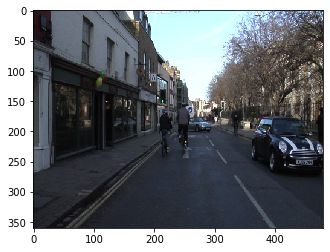

In [9]:
plt.imshow(Image.open(sample_test_image))

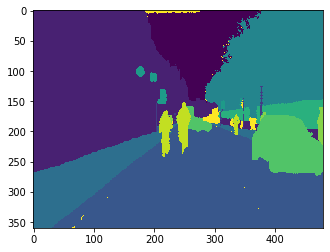

In [10]:
plt.imshow(Image.open(sample_test_annotaion))

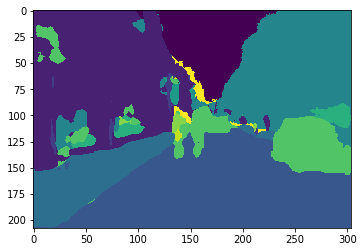

In [11]:
plt.imshow(out)

In [12]:
# evaluating the model
evaluation = model.evaluate_segmentation(
    inp_images_dir=VAL_IMAGES, 
    annotations_dir=VAL_ANNOTATIONS
)
print(evaluation)


101it [00:09, 10.65it/s]

{'frequency_weighted_IU': 0.7229938305246426, 'mean_IU': 0.10040821729207065, 'class_wise_IU': array([0.92465926, 0.63474845, 0.03473774, 0.91814314, 0.76521504,
       0.7440569 , 0.3104844 , 0.34243038, 0.18229878, 0.16255866,
       0.00749342, 0.0939929 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])}
